In [57]:
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#отображение графиков в ноутбуке
%matplotlib inline 

#для четкой прорисовки графиков
#%config InlineBackend.figure_format = 'svg'

def read_energy(file: str) -> tuple[np.ndarray, np.ndarray]:
    x_vals = []
    y_vals = []
    with open(file) as f:
        for s in f.readlines():
            time, energy = map(float, s.split())
            x_vals.append(time)
            y_vals.append(energy)
    return np.array(x_vals), np.array(y_vals)

def sliding_average(arr: np.ndarray, window):
    arr = np.pad(arr, ((10, 10)), mode='mean', stat_length=((10, 10)))
    filtered = np.convolve(arr, [1] * window, 'same') / window
    return filtered[10:len(filtered)-10]

a = np.array([3, 0, 3])
sliding_average(a, 3)

array([1.66666667, 2.        , 1.66666667])

# Stress vs strain

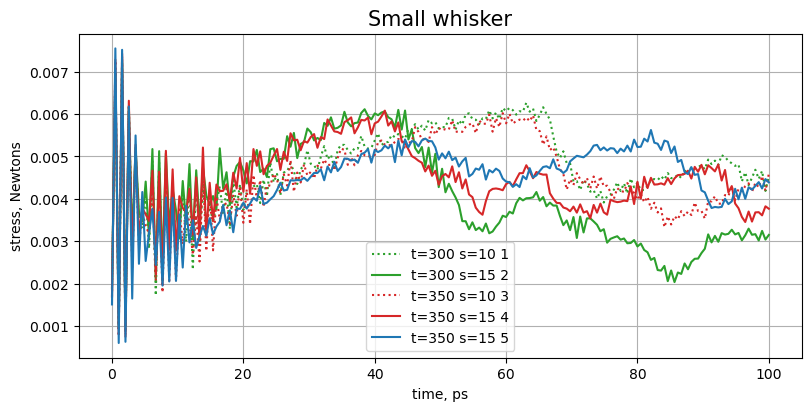

In [74]:
#base_path = "../buildDir/milestones/09/"
base_path = "data-milestone-09/"
x, stress1 = read_energy(base_path + "stress-1.txt")
x, stress2 = read_energy(base_path + "stress-2.txt")
x, stress3 = read_energy(base_path + "stress-3.txt")
x, stress4 = read_energy(base_path + "stress-4.txt")
x, stress5 = read_energy(base_path + "stress-5.txt")

x = np.linspace(0, 100, len(stress1))
fig, axs = plt.subplots(1, 1, layout='constrained', figsize=(8,4))

axs.set_title('Small whisker',fontsize=15)
axs.plot(x, stress1, linestyle=':', color='tab:green', label='t=300 s=10 1')
axs.plot(x, stress2, linestyle='-', color='tab:green', label='t=300 s=15 2')
axs.plot(x, stress3, linestyle=':', color='tab:red', label='t=350 s=10 3')
axs.plot(x, stress4, linestyle='-', color='tab:red', label='t=350 s=15 4')
axs.plot(x, stress5, linestyle='-', color='tab:blue', label='t=350 s=15 5')


axs.grid(True)
axs.set_xlabel('time, ps',  fontsize=10)
axs.set_ylabel('stress, Newtons',  fontsize=10)
axs.legend(fontsize=10)

fig.savefig("fig.pdf")

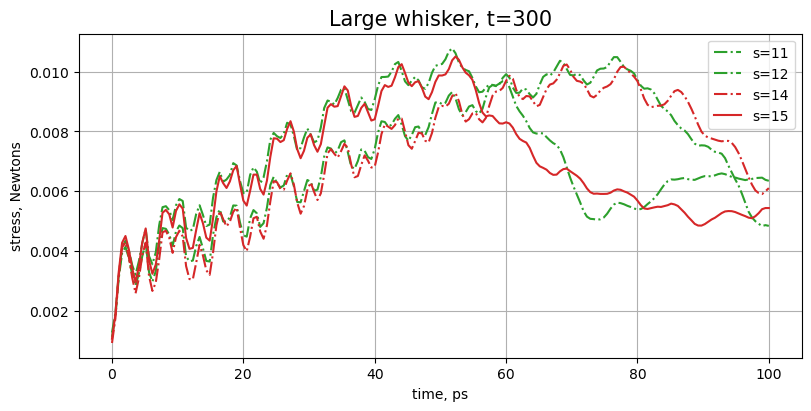

In [77]:
base_path = "data-milestone-09/"
x, stress11 = read_energy(base_path + "stress-11.txt")
x, stress12 = read_energy(base_path + "stress-12.txt")
x, stress14 = read_energy(base_path + "stress-14.txt")
x, stress15 = read_energy(base_path + "stress-15.txt")

stress11 = sliding_average(stress11, 5)
stress12 = sliding_average(stress12, 5)
stress14 = sliding_average(stress14, 5)
stress15 = sliding_average(stress15, 5)

x = np.linspace(0, 100, len(stress11))
fig, axs = plt.subplots(1, 1, layout='constrained', figsize=(8,4))

axs.set_title('Large whisker, t=300',fontsize=15)
axs.plot(x, stress11, linestyle='-.', color='tab:green', label='s=11')
axs.plot(x, stress12, linestyle='-.', color='tab:green', label='s=12')
axs.plot(x, stress14, linestyle='-.', color='tab:red', label='s=14')
axs.plot(x, stress15, linestyle='-', color='tab:red', label='s=15')

axs.grid(True)
axs.set_xlabel('time, ps',  fontsize=10)
axs.set_ylabel('stress, Newtons',  fontsize=10)
axs.legend(fontsize=10)

fig.savefig("fig.pdf")

## Final figures

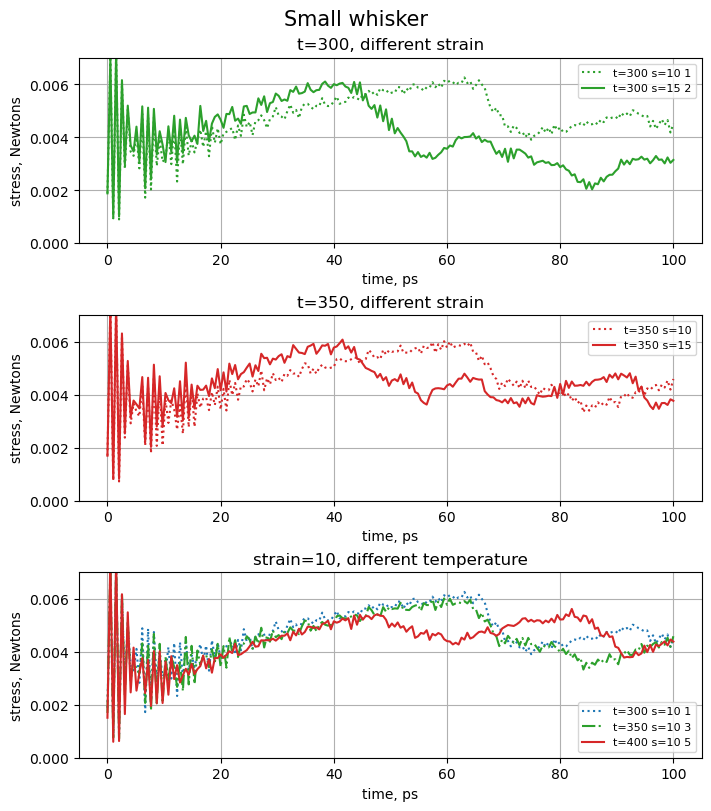

In [91]:
#base_path = "../buildDir/milestones/09/"
base_path = "data-milestone-09/"
x, stress1 = read_energy(base_path + "stress-1.txt")
x, stress2 = read_energy(base_path + "stress-2.txt")
x, stress3 = read_energy(base_path + "stress-3.txt")
x, stress4 = read_energy(base_path + "stress-4.txt")
x, stress5 = read_energy(base_path + "stress-5.txt")

x = np.linspace(0, 100, len(stress1))
fig, axs = plt.subplots(nrows=3, ncols=1, layout='constrained', figsize=(7,8))

fig.suptitle('Small whisker', fontsize=15)

axs[0].set_title('t=300, different strain')
axs[0].plot(x, stress1, linestyle=':', color='tab:green', label='t=300 s=10 1')
axs[0].plot(x, stress2, linestyle='-', color='tab:green', label='t=300 s=15 2')

axs[1].set_title('t=350, different strain')
axs[1].plot(x, stress3, linestyle=':', color='tab:red', label='t=350 s=10')
axs[1].plot(x, stress4, linestyle='-', color='tab:red', label='t=350 s=15')

axs[2].set_title('strain=10, different temperature')
axs[2].plot(x, stress1, linestyle=':', color='tab:blue', label='t=300 s=10 1')
axs[2].plot(x, stress3, linestyle='-.', color='tab:green', label='t=350 s=10 3')
axs[2].plot(x, stress5, linestyle='-', color='tab:red', label='t=400 s=10 5')



axs[0].grid(True)
axs[1].grid(True)
axs[2].grid(True)

axs[0].set_ylim((0, 0.007))
axs[0].set_xlabel('time, ps',  fontsize=10)
axs[0].set_ylabel('stress, Newtons',  fontsize=10)

axs[1].set_ylim((0, 0.007))
axs[1].set_xlabel('time, ps',  fontsize=10)
axs[1].set_ylabel('stress, Newtons',  fontsize=10)

axs[2].set_ylim((0, 0.007))
axs[2].set_xlabel('time, ps',  fontsize=10)
axs[2].set_ylabel('stress, Newtons',  fontsize=10)

axs[0].legend(fontsize=8)
axs[1].legend(fontsize=8)
axs[2].legend(fontsize=8)

fig.savefig("fig.pdf")

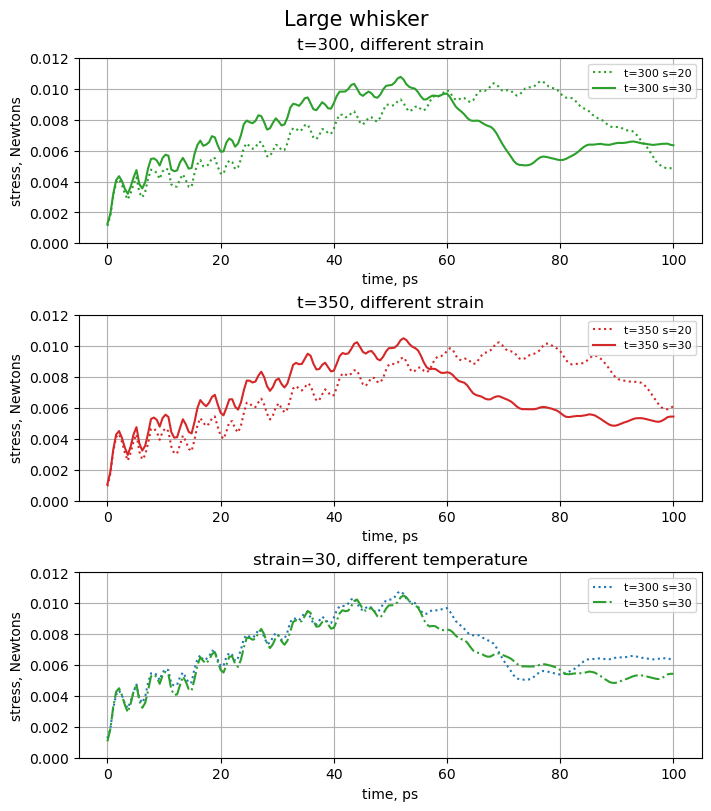

In [96]:
#base_path = "../buildDir/milestones/09/"
base_path = "data-milestone-09/"
x, stress11 = read_energy(base_path + "stress-11.txt")
x, stress12 = read_energy(base_path + "stress-12.txt")
x, stress14 = read_energy(base_path + "stress-14.txt")
x, stress15 = read_energy(base_path + "stress-15.txt")

stress11 = sliding_average(stress11, 5)
stress12 = sliding_average(stress12, 5)
stress14 = sliding_average(stress14, 5)
stress15 = sliding_average(stress15, 5)

x = np.linspace(0, 100, len(stress1))
fig, axs = plt.subplots(nrows=3, ncols=1, layout='constrained', figsize=(7,8))

fig.suptitle('Large whisker', fontsize=15)

axs[0].set_title('t=300, different strain')
axs[0].plot(x, stress11, linestyle=':', color='tab:green', label='t=300 s=20')
axs[0].plot(x, stress12, linestyle='-', color='tab:green', label='t=300 s=30')

axs[1].set_title('t=350, different strain')
axs[1].plot(x, stress14, linestyle=':', color='tab:red', label='t=350 s=20')
axs[1].plot(x, stress15, linestyle='-', color='tab:red', label='t=350 s=30')

axs[2].set_title('strain=30, different temperature')
axs[2].plot(x, stress12, linestyle=':', color='tab:blue', label='t=300 s=30')
axs[2].plot(x, stress15, linestyle='-.', color='tab:green', label='t=350 s=30')



axs[0].grid(True)
axs[1].grid(True)
axs[2].grid(True)

axs[0].set_ylim((0, 0.012))
axs[0].set_xlabel('time, ps',  fontsize=10)
axs[0].set_ylabel('stress, Newtons',  fontsize=10)

axs[1].set_ylim((0, 0.012))
axs[1].set_xlabel('time, ps',  fontsize=10)
axs[1].set_ylabel('stress, Newtons',  fontsize=10)

axs[2].set_ylim((0, 0.012))
axs[2].set_xlabel('time, ps',  fontsize=10)
axs[2].set_ylabel('stress, Newtons',  fontsize=10)

axs[0].legend(fontsize=8)
axs[1].legend(fontsize=8)
axs[2].legend(fontsize=8)

fig.savefig("fig.pdf")